In [1]:
import pandas as pd

In [2]:
food_orders = pd.read_csv(r"C:\Akshay\Datasets\food_orders_bangalore.csv")
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [3]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [4]:
# convert order date and delivery date to datetime format
from datetime import datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

In [5]:
food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [6]:
    # function to extract numeric values from the 'Discounts and Offers' string
    def extract_discount(discount_str):
        if 'off' in discount_str:
            # Fixed amount off
            return float(discount_str.split(' ')[0])
        elif '%' in discount_str:
            # Percentage off
            return float(discount_str.split('%')[0])
        else:
            # No discount
            return 0.0

    # apply the function to create a new 'Discount Percentage' column
    food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))

    # for % discount calculate discount based on order value
    food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                      if x['Discount Percentage'] > 1
                                                      else x['Discount Percentage'], axis=1)

    # Adjust for the fixed amount discount
    food_orders['Discount Amount'] = food_orders.apply(lambda x: extract_discount(x['Discounts and Offers'])
                                                       if 'off' in x['Discounts and Offers'] 
                                                       else x['Discount Amount'], axis=1)

    print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Amount']].head(10), food_orders.dtypes)

   Order Value Discounts and Offers  Discount Amount
0         1914            5% on App            95.70
1          986                  10%            98.60
2          937         15% New User           140.55
3         1463                 None             0.00
4         1992         50 off Promo            50.00
5          439                  10%            43.90
6          303            5% on App            15.15
7          260                  10%            26.00
8         1663            5% on App            83.15
9          491                  10%            49.10 Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment

In [7]:
# calculate total cost and revenue per order
food_orders['Total Cost'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']

# revenue is derived form the comission fee
food_orders['Revenue'] = food_orders['Commission Fee']

food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Cost']

food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Cost,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0,0.0,0.00,77.00,146,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,50.00,130.00,130,0.00


In [8]:
# aggregate the data 
total_orders = food_orders['Order ID'].count()
total_revenue = food_orders['Revenue'].sum()
total_profit = food_orders['Profit'].sum()
total_cost = round(food_orders['Total Cost'].sum(),2)

overall_metrics = {
    'Total Orders': total_orders,
    'Total Revenue': total_revenue,
    'Total Cost': total_cost,
    'Total Profit': total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Cost': 132741.85, 'Total Profit': -5751.85}


In [9]:
# Resulting net loss suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

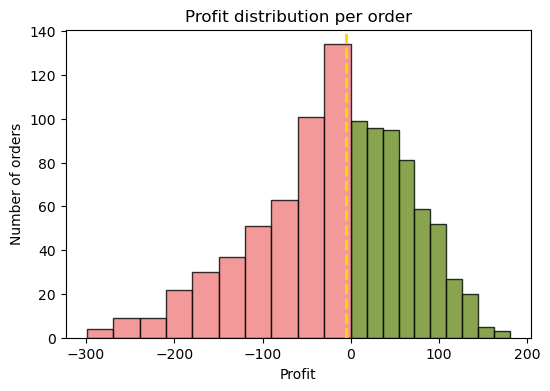

In [10]:
# profits per order
import matplotlib.pyplot as plt

# read columns data based on filters or conditions
positive_profits = food_orders['Profit'][food_orders['Profit'] > 0]
negative_profits = food_orders['Profit'][food_orders['Profit'] < 0]

plt.figure(figsize=(6,4))

plt.hist(positive_profits, bins=10, color='olivedrab', alpha=0.8, edgecolor='black')
plt.hist(negative_profits, bins=10, color='lightcoral', alpha=0.8, edgecolor='black')

plt.title('Profit distribution per order')
plt.xlabel('Profit')
plt.ylabel('Number of orders')
plt.axvline(food_orders['Profit'].mean(), color = 'gold', linestyle = 'dashed', linewidth = 2)
plt.show()

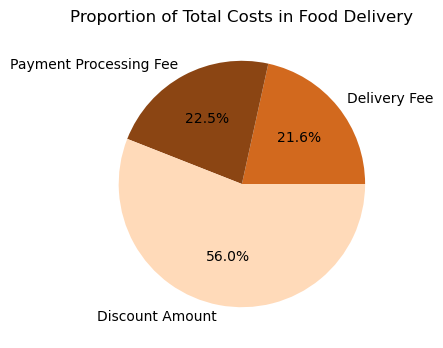

In [11]:
# pie chart
cost_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(4,4))
plt.pie(cost_breakdown, labels=cost_breakdown.index, autopct='%1.1f%%', colors=['chocolate', 'saddlebrown', 'peachpuff'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

In [12]:
#Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

In [13]:
# Comparing total revenue, costs and profit

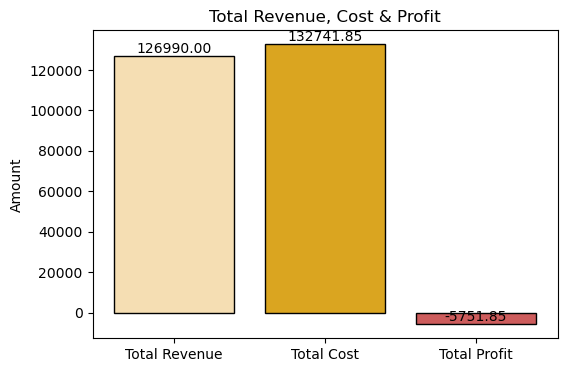

In [14]:
totals = ['Total Revenue', 'Total Cost', 'Total Profit']
values = [total_revenue, total_cost, total_profit]

plt.figure(figsize=(6,4))
bars = plt.bar(totals, values, color=['wheat', 'goldenrod', 'indianred'], edgecolor='black')
plt.title('Total Revenue, Cost & Profit')
plt.ylabel('Amount')

# Display the values on the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
             ha='center', va='bottom')
    
plt.show()

In [15]:
# finding new average profitable comission and discount from our profitable orders

profitable_orders = food_orders[food_orders['Profit'] > 0] # creates a dataframe

profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = round(profitable_orders['Commission Percentage'].mean(),2)
new_avg_discount_percentage = round(profitable_orders['Effective Discount Percentage'].mean(), 2)

print(new_avg_commission_percentage, new_avg_discount_percentage)

27.71 5.62


C:\Users\Akshay\AppData\Local\Temp\ipykernel_12508\2967402332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
C:\Users\Akshay\AppData\Local\Temp\ipykernel_12508\2967402332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100
